In [12]:
import pandas as pd
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random

Start of Lyn's work. Second section contains Jenny's work.

In [13]:
def load_data(path_to_data, file_list):
    '''Load 2D images and their corresponding labels
    Parameters:
    path_to_data (str): This is the path to data
    
    Returns:
    images (np.ndarray): A numpy array of shape (N, 64, 64, 3)
    labels (np.ndarray): A numpy array of shape (N)
    
    '''
    folder_names = os.listdir(path_to_data)
    images = []
    labels = []

    for rel_path in file_list:
        image_path  = os.path.join(path_to_data, rel_path)
        try:
            img = load_img(image_path, target_size=(64, 64))
            image_arr = img_to_array(img)
            images.append(image_arr)
            
            label_folder = rel_path.split('/')[0]
            label = label_folder.split('-')[1]
            labels.append(label)

        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            continue


    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [14]:
from scipy.io import loadmat

# Load the .mat file
BASE_DIR = os.getcwd() 
DATA_PATH = os.path.join(BASE_DIR, "images")

train_list_path = os.path.join(BASE_DIR, "lists/train_list.mat")
train_annotation = loadmat(train_list_path)
train_list = train_annotation['file_list']
train_list = [item[0][0] for item in train_list]

test_list_path = os.path.join(BASE_DIR, "lists/test_list.mat")
test_annotation = loadmat(test_list_path)
test_list = test_annotation['file_list']
test_list = [item[0][0] for item in test_list]

In [15]:
# Load data to train and test

# Load train
X_train, y_train = load_data(DATA_PATH, train_list)
print("Shape of training images ", X_train.shape)
print("Shape of training labels ", y_train.shape)

# Load test
X_test, y_test = load_data(DATA_PATH, test_list)
print("Shape of testing images ", X_test.shape)
print("Shape of testing labels ", y_test.shape)

Shape of training images  (12000, 64, 64, 3)
Shape of training labels  (12000,)
Shape of testing images  (8580, 64, 64, 3)
Shape of testing labels  (8580,)


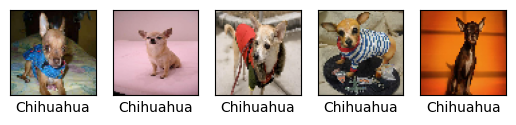

In [16]:
# Plot first 8
breeds = list(y_train[:5])
images = X_train[:5]
cols = len(breeds)
for i in range(len(breeds)):
    plt.subplot(2, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = array_to_img(images[i])
    plt.imshow(img)
    plt.xlabel(breeds[i])

plt.show();

End of Lyn's work, below starts Jenny's work

In [17]:
# checking that data is as described from data source
# we should have 120 classes in both train and test dataset
unique_labels_train = np.unique(y_train, return_counts=True)
unique_labels_test = np.unique(y_test)

print(unique_labels_train)              # checking label format and # of examples per class
print(len(unique_labels_train[0]))      # checking we have 120 classes in train
print(len(unique_labels_test))          # checking we have 120 classes in test

(array(['Afghan_hound', 'African_hunting_dog', 'Airedale',
       'American_Staffordshire_terrier', 'Appenzeller',
       'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog',
       'Blenheim_spaniel', 'Border_collie', 'Border_terrier',
       'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon',
       'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever',
       'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound',
       'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog',
       'French_bulldog', 'German_shepherd', 'German_short',
       'Gordon_setter', 'Great_Dane', 'Great_Pyrenees',
       'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter',
       'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound',
       'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
       'Maltese_dog', 'Mexican_hairless', 'Newfoundland',
       'Norfolk_terri

In [18]:
# check distribution of classes in test dataset

label_counts = pd.Series(y_test).value_counts()
df_test_breed_counts = label_counts.reset_index()
df_test_breed_counts.columns = ['label', 'count']

df_test_breed_counts = df_test_breed_counts.sort_values(by='count', ascending=False)

print(df_test_breed_counts)

                      label  count
0               Maltese_dog    152
1              Afghan_hound    139
2        Scottish_deerhound    132
3                Pomeranian    119
4      Bernese_mountain_dog    118
..                      ...    ...
108                Doberman     50
106  Welsh_springer_spaniel     50
105                 clumber     50
118                Pekinese     49
119                 redbone     48

[120 rows x 2 columns]


In [19]:
# perform random stratified split on test dataset in half to get validation dataset
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                stratify=y_test,
                                                shuffle=True,
                                                random_state=42)


print("Shape of validation images ", X_val.shape)
print("Shape of validation labels ", y_val.shape)
print("Shape of testing images ", X_test.shape)
print("Shape of testing labels ", y_test.shape)

Shape of validation images  (4290, 64, 64, 3)
Shape of validation labels  (4290,)
Shape of testing images  (4290, 64, 64, 3)
Shape of testing labels  (4290,)


In [20]:
# make labels all lowercase
y_train = np.char.lower(y_train)
y_val = np.char.lower(y_val)
y_test = np.char.lower(y_test)

print(y_train[0:5])
print(y_val[0:5])

['chihuahua' 'chihuahua' 'chihuahua' 'chihuahua' 'chihuahua']
['mexican_hairless' 'english_foxhound' 'sealyham_terrier' 'shih' 'saluki']


In [21]:
# shuffle train dataset, since it does not look shuffled
np.random.seed(42)
indices = np.random.permutation(len(X_train))

X_train = X_train[indices]
y_train = y_train[indices]

print(y_train[0:5]) # verify shuffle worked

['irish_wolfhound' 'brittany_spaniel' 'redbone' 'boxer' 'pekinese']


In [22]:
# selecting random 10 classes to train on before expanding to all 120 classes
labels = np.unique(y_train)

np.random.seed(42)
classes_subset = np.random.choice(labels, size=10, replace=False)

print(classes_subset)

['flat' 'german_short' 'american_staffordshire_terrier' 'ibizan_hound'
 'cairn' 'kerry_blue_terrier' 'maltese_dog' 'bedlington_terrier'
 'english_setter' 'sussex_spaniel']


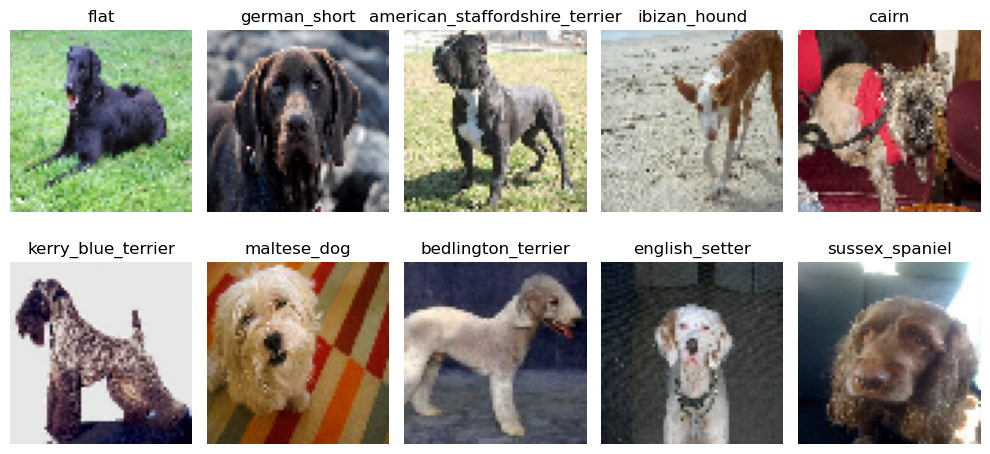

In [23]:
# displaying a random example from each subset class
num_labels = len(classes_subset)
cols = min(num_labels, 5)
rows = (num_labels + cols - 1) // cols

plt.figure(figsize=(10,5))

for i, label in enumerate(classes_subset):
    # Find all indices in y_train with this label
    indices = [idx for idx, val in enumerate(y_train) if val == label]
    
    # Randomly select one index
    plt.subplot(rows, cols, i + 1)
    random_index = random.choice(indices)
    img = array_to_img(X_train[random_index])
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
# create subsetted datasets
mask_1 = np.isin(y_train, classes_subset)
mask_2 = np.isin(y_val, classes_subset)

X_train_sub = X_train[mask_1]
y_train_sub = y_train[mask_1]
X_val_sub = X_val[mask_2]
y_val_sub = y_val[mask_2]

print("Shape of training images ", X_train_sub.shape)
print("Shape of training labels ", y_train_sub.shape)
print("Shape of validation images ", X_val_sub.shape)
print("Shape of validation labels ", y_val_sub.shape)

Shape of training images  (1000, 64, 64, 3)
Shape of training labels  (1000,)
Shape of validation images  (388, 64, 64, 3)
Shape of validation labels  (388,)


In [25]:
# normalize pixel values for image data
print("Example before normalizing:", X_train_sub[0][0][0])

X_train_sub = X_train_sub / 255.0
X_val_sub = X_val_sub / 255.0

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print("Example after normalizing:", X_train_sub[0][0][0])

Example before normalizing: [218. 247. 251.]
Example after normalizing: [0.85490197 0.96862745 0.9843137 ]


In [27]:
#save processed datasets into pkl file

import pickle

save_path_1 = os.path.join(BASE_DIR, "processed/processed_sub_dataset.pkl")
save_path_2 = os.path.join(BASE_DIR, "processed/processed_full_dataset.pkl")

with open(save_path_1, "wb") as f:
    pickle.dump({
        "X_train_sub": X_train_sub,         # first train with smaller subset
        "y_train_sub": y_train_sub,         # first train with smaller subset
        "X_val_sub": X_val_sub,             # validation for smaller subset
        "y_val_sub": y_val_sub,             # validation for smaller subset
        "classes_sub": classes_subset,      # array of class names for subset
    }, f)

print("Saved to:", save_path_1)

with open(save_path_2, "wb") as f:
    pickle.dump({
        "X_train": X_train,                 # then train with all classes
        "y_train": y_train,                 # then train with fall classes
        "X_val": X_val,                     # validation for all classes
        "y_val": y_val,                     # validation for all classes
        "X_test": X_test,                   # test images (all classes)
        "y_test": y_test,                   # test labels (all classes)
        "classes": labels,                  # array of all class names
    }, f)

print("Saved to:", save_path_2)

Saved to: /Users/jenny/github/mids-w207-foursigma/data/processed/processed_sub_dataset.pkl
Saved to: /Users/jenny/github/mids-w207-foursigma/data/processed/processed_full_dataset.pkl


In [14]:
# use the following code to load dataset in your notebook

# with open("../data/processed/processed_sub_dataset.pkl", "rb") as f:
#     data = pickle.load(f)
# print(data.keys())

# with open("../data/processed/processed_full_dataset.pkl", "rb") as f:
#     data = pickle.load(f)
# print(data.keys())